In [24]:
import librosa
import numpy as np
from matplotlib import pyplot as plt

In [25]:
src_path = "F:\\projects\\pythonProjects\\pythonProject9\\test1\\test.wav"
wave, sr = librosa.load(src_path)
wave,sr

(array([ 0.        ,  0.        ,  0.        , ...,  0.00128385,
         0.00016974, -0.00162349], dtype=float32),
 22050)

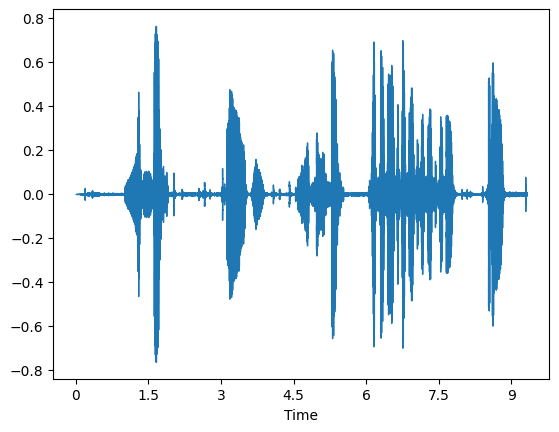

In [26]:
librosa.display.waveshow(wave)

In [27]:
def root_mean_square_energy(wave, frame_length, hop_size):
    wave_len = len(wave)
    frame_num = int((wave_len - frame_length) / hop_size) + 1
    if (wave_len - frame_length) % hop_size != 0 or wave_len < frame_length:
        pad = frame_num * hop_size + frame_length - wave_len
        wave = np.pad(wave, (0, pad), 'constant')
    rms_list = []
    for i in range(frame_num):
        samples = wave[i * hop_size : i * hop_size + frame_length]
        rms = np.sqrt(np.mean(samples**2))
        rms_list.append(rms)
    return rms_list, frame_num

In [43]:
frame_length = 256
hop_size = int(frame_length / 2)

rms_list, frame_num = root_mean_square_energy(wave, frame_length, hop_size)
# rms_list, frame_num

In [51]:
frame_scale = np.arange(frame_num)
time_scale = librosa.frames_to_time(frame_scale, sr=sr, hop_length=hop_size)
# frame_scale,time_scale

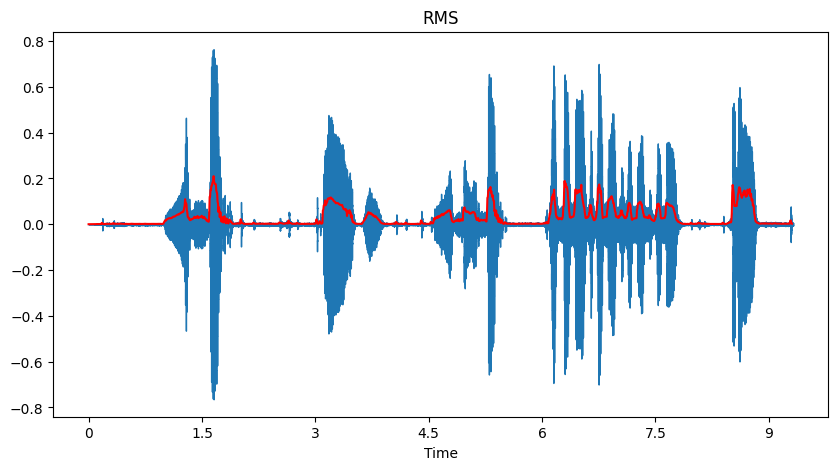

In [52]:
plt.figure(figsize=(10,5))
plt.plot(time_scale, rms_list, color= 'r')
plt.title('RMS')
librosa.display.waveshow(wave)
plt.show()
